# Networked Data Analysis


This notebook will take you through different aspects of networked data, especially graphs and how to create, save, load, manipulate, visualise and analyse them in python. The library used for this is called networkx, which is a python library that is written for working with graphs. The documentation can be found here: https://networkx.org/. You can run `pip install networkx` to install the package.



### Graphs


In [6]:
import networkx as nx
import numpy as np
from matplotlib import pyplot as plt
from enum import Enum
from random import randint, random, randrange
import scipy as sp
import warnings


Using networkx you can create graphs from scratch:

In [9]:
graph = nx.Graph()
nodes = list(range(4)) # Establish that there are going to be 4 points.
edges = [(0,1), (1,2), (2,3), (3,0)] # Define the lines: from 0 to 1, 1 to 2, etc.


You can then add the edges and nodes as such:

In [10]:
graph.add_nodes_from(nodes)
graph.add_edges_from(edges)
print("nodes of graph: {}".format(list(graph.nodes)))
print("edges of graph: {}".format(list(graph.edges)))


nodes of graph: [0, 1, 2, 3]
edges of graph: [(0, 1), (0, 3), (1, 2), (2, 3)]


You can then look at how this graph actually looks like:

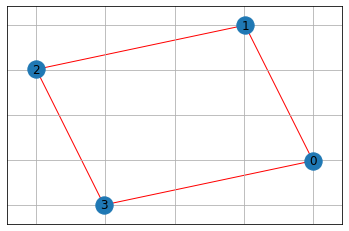

In [15]:
plt.grid() # Sets the grid.
nx.draw_networkx(graph, with_labels=True, edge_color="red")
plt.show()


Graphs in networkx are also pickleable, this is an easy way to save them for future use:

In [16]:
nx.write_gpickle(graph, "graph.gpickle")
graph = nx.read_gpickle("graph.gpickle")
print(graph)


Graph with 4 nodes and 4 edges


Networkx graphs can have attributes associated with graph, nodes and edges:

In [21]:
# Associate attributes to the nodes and edges.
graph.graph["type"] = "student"
graph.graph


{'type': 'student'}

In [22]:
import random
for ind, node in enumerate(graph.nodes):
  graph.nodes[node]["student"] = ind
print("Nodes (points):", graph.nodes.data())
for s,d in graph.edges:
  graph[s][d]["weight"] = random.random()
print("Edges (lines):", graph.edges.data())


Nodes (points): [(0, {'student': 0}), (1, {'student': 1}), (2, {'student': 2}), (3, {'student': 3})]
Edges (lines): [(0, 1, {'weight': 0.6326514869067984}), (0, 3, {'weight': 0.440566035218967}), (1, 2, {'weight': 0.733271050647687}), (2, 3, {'weight': 0.547880529990097})]


## Generating Graphs

Often you might need to produce a **larger number of graphs, that have qualities of real graphs you are trying to mimic.** This might be because you need data to train an algorithm or you are trying to understand the process behind the formation of certain graph structures. To two most common of these are **Erdos-Renyi** and **Barabasi-Albert** Graphs. 

#### Erdos-Renyi (ER)
The ER generative graph model is very simple, it simply models the existence of an edge in the graph given a probability $p$. This probaiblity is chosen by the user and the edges are chosen from a Bernoulli distribution $B(p)$. The **expected number of edges is given by** ${N \choose 2}p$. In networkx you can do this like this:

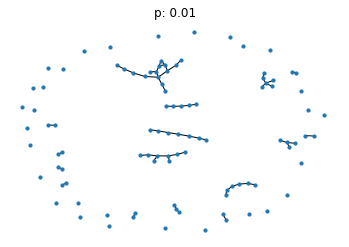

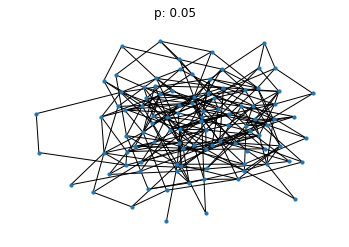

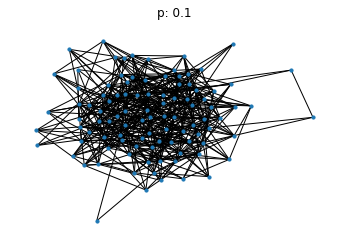

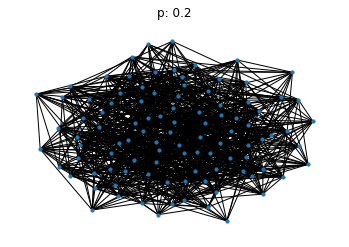

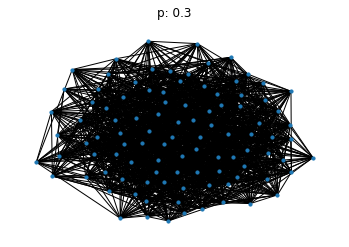

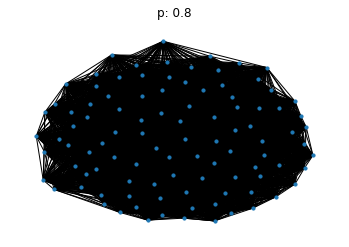

In [23]:
probabilities = [0.01, 0.05, 0.1, 0.2, 0.3, 0.8]
for p in probabilities:
  plt.title("p: {}".format(p))
  nx.draw(nx.erdos_renyi_graph(100, p), node_size=10)
  plt.show()


It is quite easy to see that when the **probability *p* increases, we have an increase in connectivity (more edges)** within the graph.

#### Barabasi-Albert (BA)
BA graphs are a sequential generative graph model, this means that the graph is constructed in sequence, with **edges being added after each node is added in sequence.** The BA algorithm focusses on creating graphs that have degree distributions that follow a power law (long tail) distribution. With a node, $u$, being added in sequence the probability of that node being connected to the other nodes, $v$, in the graph is given by:
$$p_{u, v}= \frac{\delta_v}{\sum_{j\in N} \delta_j}$$ 
Where u is the **node added** to the graph, v is another **node already in the graph**, $\delta_v$ is the **degree of node** $v$ and the set $N$ is the set of nodes already in the graph. This follows the principle of the 'the rich get richer' as nodes with more connections end up getting more connections in return. To generate a BA graph, you need to specify $m$ which is the **pre-defined number of edges to add at each node addition** and $n$, the number of nodes in the graph.

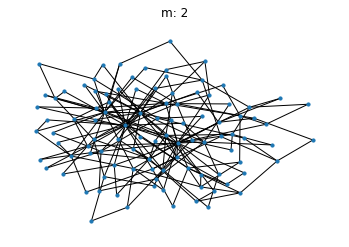

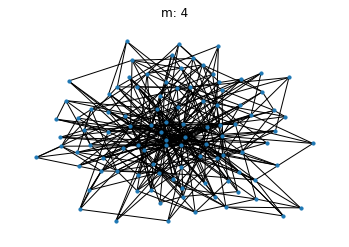

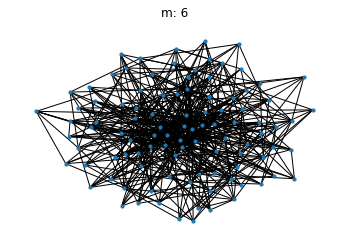

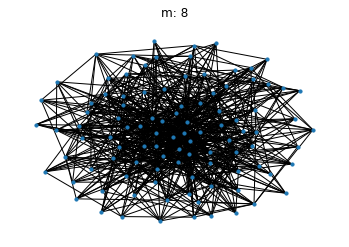

In [25]:
m_numbers = list(range(2,10, 2))
for m in m_numbers:
  ba_graph = nx.barabasi_albert_graph(100, m)
  plt.title("m: {}".format(m))
  nx.draw(ba_graph, node_size=10)
  plt.show()

# As m increases, the number of edges increases.


## Analysing Graphs

To analyse graphs on the most basic level we can look at the distribution of the degree of each node. The **degree is the number of edges that connect to a certain node.** 

In [26]:
def plot_degree_distribution(graph, plt_show=False, **kwargs):
  degree_sequence = sorted([d for n, d in graph.degree()], reverse=True)
  degreeCount = collections.Counter(degree_sequence)
  deg, cnt = zip(*degreeCount.items())
  plt.bar(deg, cnt, width=0.80, **kwargs)
  if plt_show:
    plt.legend()
    plt.grid()
    plt.show()


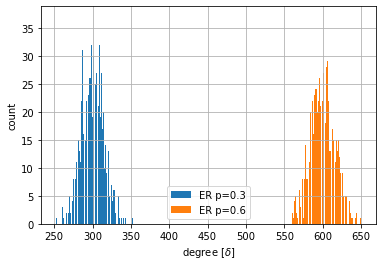

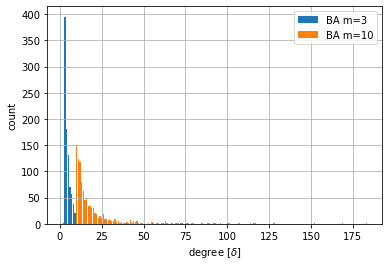

In [27]:
import collections
er_graph_low = nx.erdos_renyi_graph(1000, 0.3)
er_graph_high = nx.erdos_renyi_graph(1000, 0.6)
ba_graph_low = nx.barabasi_albert_graph(1000, 3)
ba_graph_high = nx.barabasi_albert_graph(1000, 10)

plt.xlabel(r"degree [$\delta$]")
plt.ylabel(r"count")
plot_degree_distribution(er_graph_low, plt_show=False, label="ER p=0.3")
plot_degree_distribution(er_graph_high, plt_show=True, label="ER p=0.6")

plt.xlabel(r"degree [$\delta$]")
plt.ylabel(r"count")
plot_degree_distribution(ba_graph_low, plt_show=False, label="BA m=3")
plot_degree_distribution(ba_graph_high, plt_show=True, label="BA m=10")


Between the two generative models (ER and BA), we can see that the degree distributions are vastly different. Here we can see that the **ER degree distribution is more like a normal curve** and the **BA degree distribution has a long tail,** normally seen on power law distributions.

Other measures used to analyse graphs often involved are node embeddings, diameter values, as well as various manipulations around the normalised laplacian matrix and their eigenvalues. Some more resources to look at:


*   A spectral graph theory method for analysing graph structures: https://www.cl.cam.ac.uk/techreports/UCAM-CL-TR-729.html
*   Introductions into spectral graph theory: http://www.math.ucsd.edu/~fan/research/revised.html




## Visualising Signal on Graphs


Often, edges and nodes on graphs carry information (a signal) and part of analysing a graph is to visualise such signals. In the following, we show how to show different signals on the nodes of a graph representing a 2D multiple rooms environment. 

In [28]:
# Title classes.
class Room(object):

    def __init__(self, id, corner, width, height):
        self.id = id
        self.corner = corner
        self.height = height
        self.width = width

    def __repr__(self):
        return "ID: %d, corner (%s), height %d, width %d" % (self.id, self.corner, self.height, self.width)


class Corner(Enum):
    BOTTOM_LEFT = 1
    BOTTOM_RIGHT = 2
    TOP_LEFT = 3
    TOP_RIGHT = 4


In [29]:
# Title utils.
def create_full_grid(width, height):
    """
    Create a grid environment.
    :param width:   int, width of the grid
    :param height:  int, height of the grid
    :return:        Networkx object, Room object, the grid graph and corresponding room
    """
    graph = nx.grid_2d_graph(width, height)

    for x in range(width):
        for y in range(height):
            graph.add_node((x,y), room_id=1, is_goal=0, is_start=0)

    graph.nodes[(0, 0)].update(is_start=1)
    graph.nodes[(width-1, height-1)].update(is_reward=1)

    room = Room(1, (0, 0), width, height)

    return graph, room


def get_distance_from_wall(room, pos):
    """
    For a given location in a room, compute the shortest distance to a wall.
    :param room:    Room, the room
    :param pos:     (int, int), the coordinate of the state
    :return:        int, the shortest distance from pos to a wall
    """
    o_x, o_y = room.corner
    x, y = pos
    distance_from_wall = min(x - o_x,                       # distance to left wall
                             (o_x + room.width - 1) - x,    # distance to right wall
                             y - o_y,                       # distance to bottom wall
                             (o_y + room.height - 1) - y)   # distance to top wall
    return distance_from_wall


def split_room(graph, room, new_id):
    """
    Split in half a given room in a graph into two rooms.
    :param graph:   Networkx object, the graph
    :param room:    Room object, the room to split in two
    :param new_id:  int, the id of the newly created room
    :return:        Room, Room, the new rooms after the split.
    """

    if max(room.height, room.width) < 4:
        warnings.warn("room too small to be split!")
        return room, None, graph

    o_x, o_y = room.corner

    if room.height < room.width: # build a vertical all
        wall_posx = o_x + int(room.width/2) - 1
        room1 = Room(room.id, (o_x, o_y), int(room.width/2), room.height)
        room2 = Room(new_id, (wall_posx + 1, o_y), room.width - int(room.width/2), room.height)
        doorway = randrange(o_y, o_y + room.height)

        for y in range(o_y, o_y + room.height):
            if y != doorway:
                try:
                    graph.remove_edge((wall_posx, y),(wall_posx + 1, y))
                except:
                    print("Failed to remove edge")
    else:
        wall_posy = o_y + int(room.height/2) - 1
        room1 = Room(room.id, (o_x, o_y), room.width, int(room.height/2))
        room2 = Room(new_id, (o_x, wall_posy + 1), room.width, room.height - int(room.height/2))
        doorway = randrange(o_x, o_x + room.width)

        for x in range(o_x, o_x + room.width):
            if x != doorway:
                try:
                    graph.remove_edge((x, wall_posy), (x, wall_posy + 1))
                except:
                    print("Failed to remove edge")

    for x in range(room2.corner[0], room2.corner[0] + room2.width):
        for y in range(room2.corner[1], room2.corner[1] + room2.height):
            is_corner = 0

            if x == room2.corner[0] and y == room2.corner[1]:
                is_corner = Corner.BOTTOM_LEFT.value
            if x == room2.corner[0] and y == room2.corner[1] + room2.height - 1:
                is_corner = Corner.TOP_LEFT.value
            if x == room2.corner[0] + room2.width - 1 and y == room2.corner[1]:
                is_corner = Corner.BOTTOM_RIGHT.value
            if x == room2.corner[0] + room2.width - 1 and y == room2.corner[1] + room2.height - 1:
                is_corner = Corner.TOP_RIGHT.value

            graph.nodes[(x, y)].update(room_id=new_id,
                                       distance_from_wall=get_distance_from_wall(room2, (x, y)),
                                       is_corner=is_corner)

    for x in range(room1.corner[0], room1.corner[0] + room1.width):
        for y in range(room1.corner[1], room1.corner[1] + room1.height):
            is_corner = 0

            if x == room1.corner[0] and y == room1.corner[1]:
                is_corner = Corner.BOTTOM_LEFT.value
            if x == room1.corner[0] and y == room1.corner[1] + room1.height - 1:
                is_corner = Corner.TOP_LEFT.value
            if x == room1.corner[0] + room1.width - 1 and y == room1.corner[1]:
                is_corner = Corner.BOTTOM_RIGHT.value
            if x == room1.corner[0] + room1.width - 1 and y == room1.corner[1] + room1.height - 1:
                is_corner = Corner.TOP_RIGHT.value

            graph.nodes[(x, y)].update(room_id=room.id,
                                       distance_from_wall=get_distance_from_wall(room1, (x, y)),
                                       is_corner=is_corner)

    return room1, room2


def create_environment(width, height, num_rooms, draw_graph=False):
    """
    Create a multi room environment.
    :param width:       int, the width of the environment
    :param height:      int, the height of the environment
    :param num_rooms:   int, the number of rooms in the environment
    :param draw_graph:  bool, whether to plot the graph
    :return:            Networkx object, dictionary, the environment as a graph and the dictionary of all rooms within the environment
    """

    if num_rooms < 1:
        raise ValueError("The num_rooms must be at least 1.")
    if num_rooms > int(width/2) * int(height/2):
        raise ValueError("The number of rooms is to high for the chosen grid size.")
    if width < 0 or height < 0:
        raise ValueError("width and height must be greater than zero.")

    graph, room = create_full_grid(width, height)

    if num_rooms == 1:
        return graph

    all_rooms = {room.id: room}
    queue = []
    current_nb_rooms = 1

    while current_nb_rooms < num_rooms:
        if not queue:
            queue = list(all_rooms.values())
        room = queue.pop()

        room1, room2 = split_room(graph, room, current_nb_rooms + 1)

        all_rooms[room.id] = room1

        if room2 is not None:
            all_rooms[room2.id] = room2
            current_nb_rooms += 1
        elif not queue:
            warnings.warn("Created environment with %d rooms" % current_nb_rooms)
            break
    if draw_graph:
        pos = {(x, y): (x, y) for x, y in graph.nodes()}
        nx.draw_networkx(graph, pos)
    return graph, all_rooms

def compute_pvfs(G, d, normalised=False):
  if normalised:
    L = nx.normalized_laplacian_matrix(G)
  else:
    L = nx.laplacian_matrix(G)
  eval, evec = np.linalg.eigh(L.A)
  return evec[:, :d]

def compute_sru(G, d, gamma=.99):
  W = nx.adjacency_matrix(G)
  I = np.identity(W.shape[1])
  counts = np.zeros(W.shape)
  for w in range(W.shape[0]):
      sum = W[w].sum()
      for i in range(W.shape[1]):
          if sum != 0:
              counts[w, i] = W[w, i] / sum

  successor_repr = np.linalg.inv(I - .99 * counts)
  u, s,v = np.linalg.svd(successor_repr)
  return u[:, :d]

def plot_node_feature(graph, feature=None, num_PVF=1, normalised=False,  num_SRU=1, gamma=.99):
    """
    Plot the graph with node features labels.
    :param graph:   Networkx object, the graph to plot
    :param feature: string, the name of the node feature to plot
    :return:
    """
    
    pos = {(x, y): (x, y) for x, y in graph.nodes()}
    if feature == 'pos':
        fig, ax = plt.subplots(figsize=(15, 15))
        nx.draw_networkx(graph, pos, ax=ax, node_size=300, font_size=10, font_weight='bold', width=3.0, edge_color='grey')
        return

    if feature == 'pvf':
      if num_PVF == None:
        raise ValueError("Please specify which pvf to draw [0,N-1]")
      if num_PVF < 0 or num_PVF >= len(graph.nodes):
        raise ValueError("The num_PVF must be an integer between 1 and N")
      pvfs = compute_pvfs(graph, num_PVF, normalised)
      nx.draw(G, pos, node_color=pvfs[:,-1], node_size=300, cmap=plt.cm.Oranges)
      return 

    if feature == 'sru':
      if num_SRU == None:
        raise ValueError("Please specify which SR singular vector to draw [0,N-1]")
      if num_SRU < 0 or num_SRU >= len(graph.nodes):
        raise ValueError("The num_SRU must be an integer between 1 and N")
      sru = compute_sru(graph, num_SRU, gamma)
      nx.draw(G, pos, node_color=np.array(sru[:,-1]), node_size=300, cmap=plt.cm.Oranges)
      return 

    nx.draw(graph, pos, node_size=300, width=3.0)

    if feature is None:
        return

    labels = {}

    for node in graph.nodes:
        labels[node] = str(graph.nodes[node][feature])

    nx.draw_networkx_labels(graph, pos, labels=labels, font_size=12)

def get_features(graph):
  feature_matrix = []
  for n in G.nodes:
    feature_matrix.append([n[0], n[1], G.nodes[n]['distance_from_wall'], G.nodes[n]['is_corner'], G.nodes[n]['room_id']])
  return feature_matrix

def find_policy(graph, goal):
    """
    Find and plot an optimal path to a goal.
    :param graph:   Networkx Object, the environment as a graph
    :param goal:    Location of the goal state
    :return:        A shortest path to the goal.
    """
    path = nx.single_source_shortest_path(graph, (0, 0))
    pos = {(x, y): (x, y) for x, y in graph.nodes()}

    nx.draw(graph, pos, node_size=300, width=3.0, alpha=0.5)
    nx.draw_networkx_nodes(graph, pos, nodelist=path[goal], node_size=300, alpha=0.5, node_color='r')


The code above contains functions to create a graph representing a 2D rectangular multiple rooms environment. The environment is discrete, such as each location point is a node in the graph, and is connected to the node directly above, below, on the left and on the right, provided it is not on an edge (wall or door way).

Below, we use the code to create a 8X12 rectangular grid containing 5 rooms.

### Generate a multi room environment

In [30]:
height = 8
width = 12
num_rooms = 5
G, rooms = create_environment(width, height, num_rooms)


### Plot node features

Let's first observe different node features in the 5-rooms environment:

- The (x,y) coordinates
- The distance to the nearest wall
- The room ID
- The corner ID

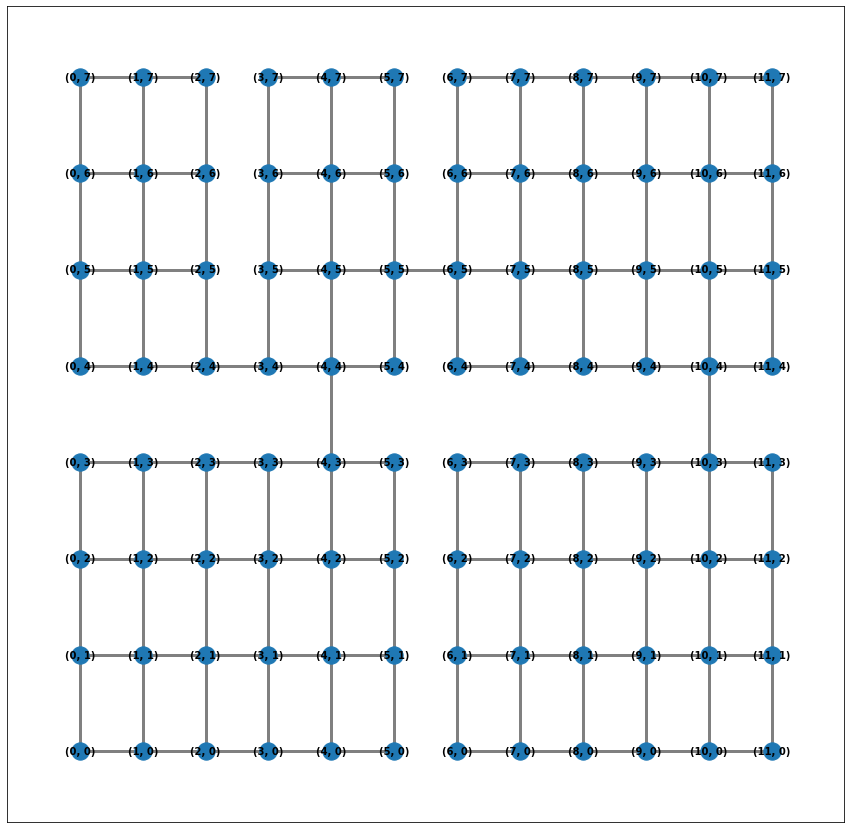

In [39]:
# Plot state positions.
plot_node_feature(G, 'pos')


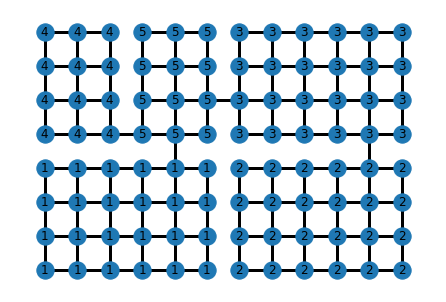

In [40]:
plot_node_feature(G, 'room_id')


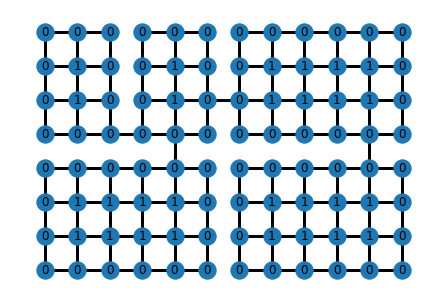

In [41]:
# Plot state distance from the wall.
plot_node_feature(G, 'distance_from_wall')


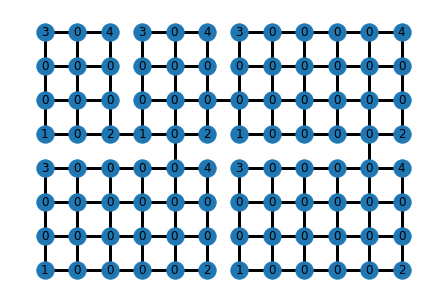

In [42]:
# Plot corner IDs
plot_node_feature(G, 'is_corner')


## Graph Embedding

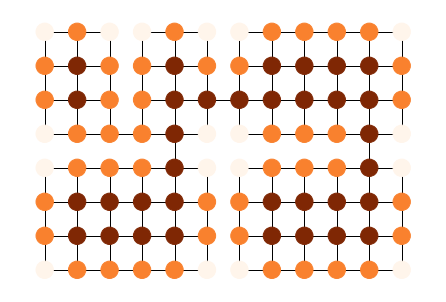

In [44]:
# Plot normalised Laplacian 1st eigenvector.
plot_node_feature(G, 'pvf', num_PVF=1, normalised=True) # num_PVF defines which eigenvector.


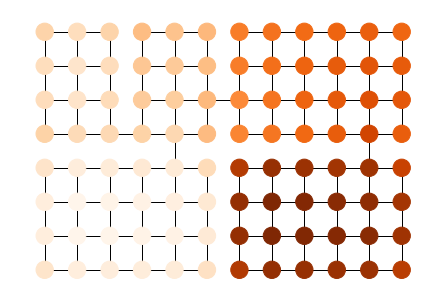

In [45]:
# Plot normalised Laplacian 2nd eigenvector.
plot_node_feature(G, 'pvf', num_PVF=2, normalised=True)


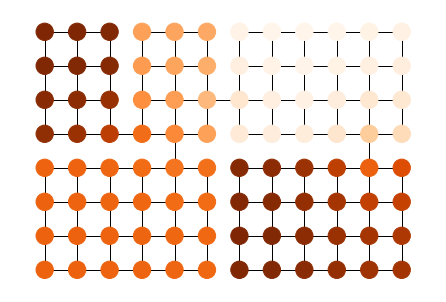

In [46]:
# Plot successor representation singular vectors.
plot_node_feature(G, 'sru', num_SRU=4, gamma=.99)


### Geometric Deep Learning

The best and most straight forward tools to use for geometric deep learning is Deep Graph Library (DGL) and Pytorch.

Installation instructions can be found here:


*   https://pytorch.org/get-started/locally/
*   https://www.dgl.ai/pages/start.html

A very easy to follow tutorial of the Graph Convolutional Network (GCN) is available at: https://docs.dgl.ai/en/0.6.x/tutorials/models/1_gnn/1_gcn.html

The paper it follows can be found here: https://arxiv.org/pdf/1609.02907.pdf



